In [1]:
import src.turing_causal_impact.queries_sales as queries_sales
import src.turing_causal_impact.causal_inference as causal_inference
# import causal_inference

import importlib
import pandas as pd
import seaborn as sns
import os
import datetime as dt
import numpy as np
import json

2024-02-27 18:05:15.675649: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 18:05:15.719590: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 18:05:15.719632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 18:05:15.720833: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 18:05:15.727624: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 18:05:15.728091: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
scenarios_files = ['./scenarios/Genmed/US/us_multaq_3-1.json']

In [5]:

scenarios = []
# with open("scenarios/us_multaq.json") as f:
#     scenarios.append(json.loads(f.read()))
# with open("scenarios/us_multaq_2.json") as f:
#     scenarios.append(json.loads(f.read()))
for s_file in scenarios_files:
    with open(s_file) as f:
        scenarios.append(json.loads(f.read()))

In [6]:
scenarios

[{'name': 'us-multaq3-1',
  'country': 'US',
  'brands': ['MULTAQ', 'SOTALOL'],
  'target_brand': 'MULTAQ',
  'metric': 'SUM(QUANTITY_SOLD)',
  'cutover': '2023-09-22',
  'min_date': '2023-01-01',
  'frequency': 'weekly'}]

# Get data

In [11]:
queries_sales = importlib.reload(queries_sales)

In [12]:
# queries_sales.get_all_sales_data([{'country':'BRAZIL', 'brands':['%PURAN%']}, {'country':'US', 'brands':['%PURAN%']}], '2024-01-01')
queries_sales.get_all_sales_data(scenarios, '2024-01-01')

amer True emea False
Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://login.microsoftonline.com/aca3c8d6-aa71-4e1a-a10e-03572fc58c0b/saml2?SAMLRequest=lZJbc9owEIX%2Fikd9tiWbazVAhuLJlMmNAgmlLx0hr4kaW6JaGZP%2B%2BgoTZpKHZCZvupyz%2BlZnBxeHsgj2YFEZPSRxxEgAWppM6e2Q3C8vwz4J0AmdicJoGJJnQHIxGqAoix0fV%2B5Rz%2BFvBegCX0gjby6GpLKaG4EKuRYlIHeSL8Y31zyJGN9Z44w0BXll%2BdghEME6T3i2ZKg83qNzO05pXddR3YqM3dKEMUbZV%2BpVR8mXs%2F7ge3pHH1PWPuq9wstnL2zflD59wUdYm5MI%2BfflchbO7hZLEozPqBOjsSrBLsDulYT7%2BfUJAD0BCm1yFfqC9rc0ZRmhNnVeiCfwu13lfNHIr2gOGS3MVvm%2Bp%2BmQ7J5UdvXPGUhzkU7mtz9%2F4Hi76m2SP70y76%2BubnC9X7mNWm9aD%2BlhLUnwcA42OQY7Raxgqo9xOn%2FEknbIkjDpLeM%2BZ13ebkXdTvKLBKmPU2nhGueZueGISiWtQZM7owuloaEUUrRkP%2BuGQvTisA2xCEXMIGStTi%2FJZacv2YYeQ07IaXB4A2JHn%2FyOAX1tfhnBW%2B%2BapjNTKPkcXBpbCvd%2BaHEUNycqC%2FNGyqEUqhh

Enter the URL the SSO URL redirected you to:  http://localhost:43081/?token=vVhZc-K6Ev4rKeaRS7zhjSKp6wWIATux2Xk5JcuyMV7xgjG__sgw2WYyczN3zpwqHqTG6v661er-pH4OojDtWShPkzhHN5p61_rLdhiB4223A0godro8z3ZsUaQ6DCA5IDpQ5HjUulmiLPeT-K5F35KtGy3PS6TFeQHiAotIutsh6Q7NzymhR3K9LnvL8eK2daOivPBjUFxW7ooizXsEkYM4cf0OiFD2F0yi6DaPk8oNQYDwLC3xAu8WjwgXOUSYeH6M7cXPmOfJXSsNfGdyLhKkukBVLGNt5pK34m16z0eusJro-ea4Kmx_YzNL9bSBrZtTFMZ57-L9XavM4l4Ccj_vxRhD3itgbybp0x72rJdmSZHAJGzd9y8-ZtelP18E8hxljY-t-xcfi_y28mMnqfLbGBUEgICBgsN1AOCpThdRoAMoEnVIhuVpF7ICJG2iT1xt3vev-zQrQFHm72dK4qCbJQhL9HNM-eXr3qyEEOV5i7jvE--VSs-gr1lACsAWkSB0YNexO13goA4QbNQRROg4LES8Q35y37ntt9nyayH8Gvh_KpQz38MJWGboGUajF6utquq2Ym6TzCNokiQJUiTwB07ue19a11XI0WI3ue8rOF9jH4LQP18yWUfFLnFupNBLMr_YRT9QSREU2ajsoBPsQKobf2l24QXOp7WQ3WdgnSjJ0JcsB518B2iWa_RZyEUZiiG6WVjaXevL5zbyvj_PQJy7SRblb8b_E827MKH4iMIkRU4nf3aqQfR5bR9HiHgLTfU9XEJ-MVY4HF9eI3RVcTky97W7tuEmODzGCSQMzrfUNSl7ewhguRvEVV2b0zp5IAqvlu76xNuVfeIl0nj8Nj1edvT64XY3fOJKs1bHaZjV0xO52A8kc5nMaE-Ax6Fi8rX3GB_Ooqm1j-WjQulbMq-K

['MULTAQ', 'SOTALOL']
Query for MULTAQ
Query for SOTALOL


# Causal impact


## installation if need be

In [13]:
causal_inference = importlib.reload(causal_inference)

Scenario: us-multaq3-1
###############################



['2023-01-06', '2023-09-22'] ['2023-09-29', '2024-02-09']



/opt/conda/lib/python3.9/site-packages/causalimpact/data.py:263: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
/opt/conda/lib/python3.9/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


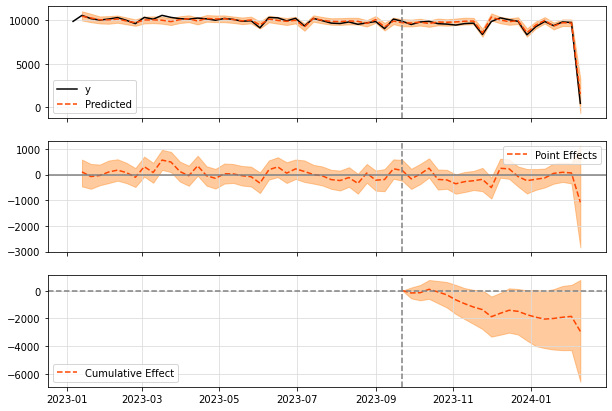

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    9119.0             182380.0
Prediction (s.d.)         9266.08 (97.51)    185321.52 (1950.12)
95% CI                    [9063.62, 9445.84] [181272.36, 188916.71]

Absolute effect (s.d.)    -147.08 (97.51)    -2941.52 (1950.12)
95% CI                    [-326.84, 55.38]   [-6536.71, 1107.64]

Relative effect (s.d.)    -1.59% (1.05%)     -1.59% (1.05%)
95% CI                    [-3.53%, 0.6%]     [-3.53%, 0.6%]

Posterior tail-area probability p: 0.07
Posterior prob. of a causal effect: 92.61%

For more details run the command: print(impact.summary('report'))


In [14]:
for scenario in scenarios:
    print(f"Scenario: {scenario['name']}")
    print("###############################")
    print()

    #load data
    df = pd.read_parquet(f"data/{scenario['name']}.parquet")
    # {'fit_method': 'hmc'}
    impact = causal_inference.provide_analyse(scenario, df, model_args={'fit_method': 'hmc'})
    
    impact.plot()
    print(impact.summary())

In [ ]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 9119.0. In the absence of an
intervention, we would have expected an average response of 9266.08.
The 95% interval of this counterfactual prediction is [9063.62, 9445.84].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -147.08 with a 95% interval of
[-326.84, 55.38]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 182380.0.
Had the intervention not taken place, we would have expected
a sum of 185321.52. The 95% interval of this prediction is [181272.36, 188916.71].


The above results are given in terms of absolute numbers. In relative
terms, the response variable s